## Import Library 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

## Read Dataset

In [65]:
read = pd.read_csv ('Customer_Behaviour.csv')
read.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Persiapan Dataset

In [66]:
read.rename (index=str, columns={
    'EstimatedSalary' : 'Pendapatan',
    
}, inplace=True)

## Drop Kolom yang tidak Dipakai

In [67]:
X = read.drop (*'User ID','Gender'], axis=1)
X

,Age,Pendapatan,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Menentukan Jumlah Cluster denga Elbow

c:\Users\gabrielsatriod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabrielsatriod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gabrielsatriod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabrielsatriod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

Text(0, 0.5, 'Inertia')

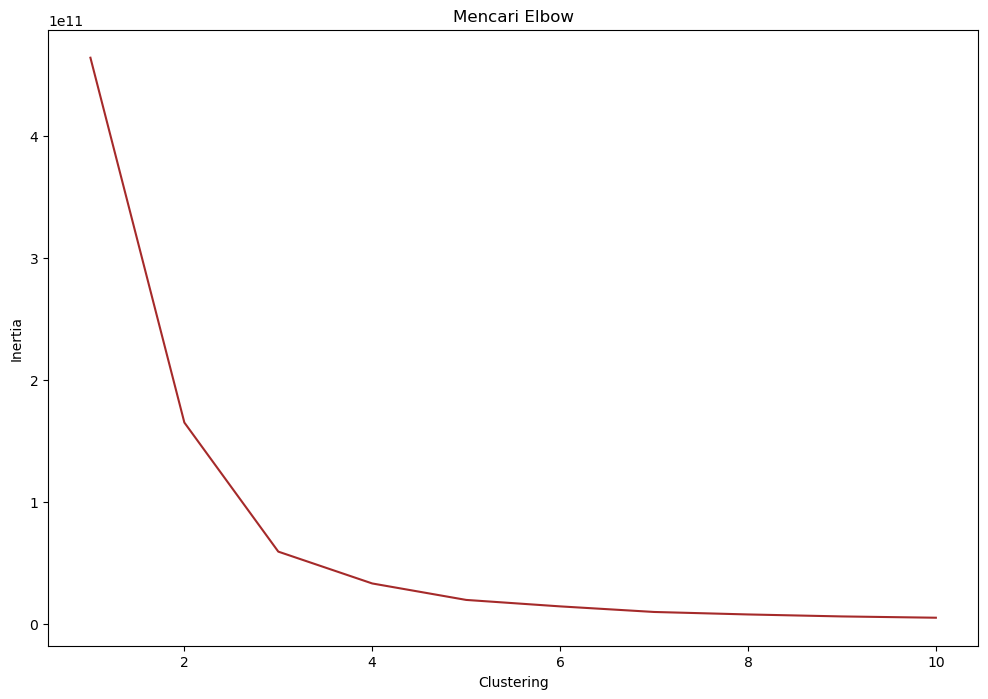

In [68]:
clustering = []
for i in range (1,11) :
    km = KMeans (n_clusters=i).fit (X)
    clustering.append (km.inertia_)
    
fig, ax = plt.subplots (figsize = (12,8))
sns.lineplot (x=list(range(1,11)), y=clustering, ax=ax, color='brown')
ax.set_title ('Mencari Elbow')
ax.set_xlabel ('Clustering')
ax.set_ylabel ('Inertia')



## Proses Clustering

In [69]:
n_clustering = 4 
kmean = KMeans (n_clusters=n_clustering).fit(X)
X ['Labels'] = kmean.labels_

c:\Users\gabrielsatriod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabrielsatriod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


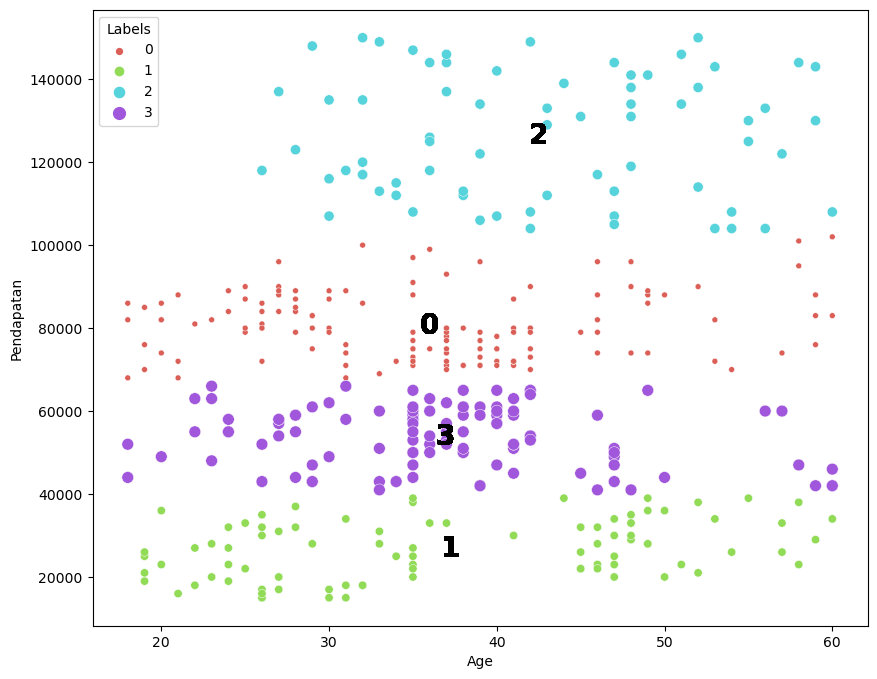

In [70]:
plt.figure(figsize=(10, 8))


sns.scatterplot(x=X['Age'], y=X['Pendapatan'], hue=X['Labels'], markers=True, 
                size=X['Labels'], palette=sns.color_palette('hls', n_clustering))

for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels']==label]['Age'].mean(),
                  X[X['Labels']==label]['Pendapatan'].mean()),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  size = 20, weight='bold',
                  color = 'black')

plt.show()

In [73]:
print(read.tail(10))

      User ID  Gender  Age  Pendapatan  Purchased
390  15807837    Male   48       33000          1
391  15592570    Male   47       23000          1
392  15748589  Female   45       45000          1
393  15635893    Male   60       42000          1
394  15757632  Female   39       59000          0
395  15691863  Female   46       41000          1
396  15706071    Male   51       23000          1
397  15654296  Female   50       20000          1
398  15755018    Male   36       33000          0
399  15594041  Female   49       36000          1
